In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

data =[]
files = []
for f in glob.glob('*_Stages_Times_Sec.csv'):
    files.append(f)
    temp_df = pd.read_csv(f)
    data.append(temp_df)
    print(f'Δημιουργήθηκε dataframe για το {f} με {temp_df.shape}')


total = pd.concat(data, axis=0)


Δημιουργήθηκε dataframe για το Boiotias_Stages_Times_Sec.csv με (204, 9)
Δημιουργήθηκε dataframe για το Potamies_Stages_Times_Sec.csv με (49, 9)
Δημιουργήθηκε dataframe για το Fthiotidas_G_Stages_Times_Sec.csv με (111, 9)
Δημιουργήθηκε dataframe για το Olympiako_Stages_Times_Sec.csv με (218, 9)
Δημιουργήθηκε dataframe για το Deth_Stages_Times_Sec.csv με (143, 9)
Δημιουργήθηκε dataframe για το Livadia_Stages_Times_Sec.csv με (131, 9)
Δημιουργήθηκε dataframe για το Fthiotidas_T_Stages_Times_Sec.csv με (183, 9)
Δημιουργήθηκε dataframe για το Stereas_Stages_Times_Sec.csv με (207, 9)
Δημιουργήθηκε dataframe για το Aigio_Stages_Times_Sec.csv με (69, 9)
Δημιουργήθηκε dataframe για το Kentavros_Stages_Times_Sec.csv με (271, 9)
Δημιουργήθηκε dataframe για το Almiros_Stages_Times_Sec.csv με (99, 9)


In [2]:
min_value = total.groupby(['Race', 'ss'])['time_SS_sec'].min()

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race         ss          
Aigio        1     573.76
             2     580.53
Almiros      1     408.44
             2     201.09
             3     407.03
             4     199.14
             5     201.96
Boiotias     1     460.90
             2     325.78
             3     448.75
             4     330.79
Deth         1     633.48
             2     830.24
             3     635.88
             4     835.21
Fthiotidas_G 1     702.34
             2    1171.34
             3     694.70
             4    1161.76
Fthiotidas_T 1     941.22
             2     407.56
             3     941.20
             4     411.50
Kentavros    1     579.98
             2     361.75
             3     167.41
             4     564.65
             5     353.50
             6     162.54
             7     389.23
             8     386.14
Livadia      1     568.07
             2     559.87
             3     564.22
Olympiako    1     434.49
             2     610.18
             3     429.57
             4     602.36
             5     604.92
             6     594.73
Potamies     1     349.77
             2     344.07
             3     341.78
Stereas      1     183.52
             2     658.94
             3     969.58
             4     642.51
             5     970.14

In [3]:
total_ss_times_F = total.merge(min_value2, on=['Race', 'ss'])
total_ss_times_F['SS.'] = total_ss_times_F['Race'] + '_' +  total_ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F['Crew'] = total_ss_times_F['Crew'].str[:8]
total_ss_times_F.to_csv('greek_rallies_2023_stages_times.csv', index=False)

In [4]:
total_ss_times_F['diff']=total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time']
total_ss_times_F['diff%']=(total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time'])/total_ss_times_F['min_time']*100
total_ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,diff,diff%
0,Tsouloft,C1,1,Boiotias,5/3/2023,Gravel,cup,1,460.90,460.90,Boiotias_01,0.00,0.000000
1,Kehagias,C1,1,Boiotias,5/3/2023,Gravel,cup,2,484.41,460.90,Boiotias_01,23.51,5.100890
2,Panteli,C1,1,Boiotias,5/3/2023,Gravel,cup,3,501.38,460.90,Boiotias_01,40.48,8.782816
3,Paradiss,C2,1,Boiotias,5/3/2023,Gravel,cup,4,511.62,460.90,Boiotias_01,50.72,11.004556
4,Halivela,3 2000,1,Boiotias,5/3/2023,Gravel,cup,5,531.11,460.90,Boiotias_01,70.21,15.233239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,Efthimia,C5 F2,5,Almiros,11/6/2023,Tarmac,cup,15,232.57,201.96,Almiros_05,30.61,15.156467
1681,Anastasi,C5 F2,5,Almiros,11/6/2023,Tarmac,cup,16,235.67,201.96,Almiros_05,33.71,16.691424
1682,Kehagias,C5 F2,5,Almiros,11/6/2023,Tarmac,cup,17,245.76,201.96,Almiros_05,43.80,21.687463
1683,Figioris,C3 F2,5,Almiros,11/6/2023,Tarmac,cup,18,251.01,201.96,Almiros_05,49.05,24.286988


In [5]:
total_ss_times_WRC = total_ss_times_F[total_ss_times_F['Gr/Cl'].str.contains('C1')]
total_ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,diff,diff%
0,Tsouloft,C1,1,Boiotias,5/3/2023,Gravel,cup,1,460.90,460.90,Boiotias_01,0.00,0.000000
1,Kehagias,C1,1,Boiotias,5/3/2023,Gravel,cup,2,484.41,460.90,Boiotias_01,23.51,5.100890
2,Panteli,C1,1,Boiotias,5/3/2023,Gravel,cup,3,501.38,460.90,Boiotias_01,40.48,8.782816
6,Chatzima,C1,1,Boiotias,5/3/2023,Gravel,cup,7,538.36,460.90,Boiotias_01,77.46,16.806249
54,Velanis,C1,1,Boiotias,5/3/2023,Gravel,cup,55,733.31,460.90,Boiotias_01,272.41,59.103927
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,Kampilis,C1,1,Almiros,11/6/2023,Tarmac,cup,3,414.86,408.44,Almiros_01,6.42,1.571834
1608,Kampilis,C1,2,Almiros,11/6/2023,Tarmac,cup,1,201.09,201.09,Almiros_02,0.00,0.000000
1628,Kampilis,C1,3,Almiros,11/6/2023,Tarmac,cup,1,407.03,407.03,Almiros_03,0.00,0.000000
1647,Kampilis,C1,4,Almiros,11/6/2023,Tarmac,cup,1,199.14,199.14,Almiros_04,0.00,0.000000


In [6]:
total_ss_times_F4 = pd.pivot_table(total_ss_times_WRC, values='diff', 
                                index=['Race', 'SS.'], 
                                columns='Crew', dropna=True)
total_ss_times_F4

Crew                          Aligizak  Anapolio  Angelov   Chatzima  \
Race         SS.                                                       
Aigio        Aigio_01              NaN       NaN       NaN       NaN   
             Aigio_02              NaN       NaN       NaN       NaN   
Almiros      Almiros_01            NaN       NaN       NaN       NaN   
             Almiros_02            NaN       NaN       NaN       NaN   
             Almiros_03            NaN       NaN       NaN       NaN   
             Almiros_04            NaN       NaN       NaN       NaN   
             Almiros_05            NaN       NaN       NaN       NaN   
Boiotias     Boiotias_01           NaN       NaN       NaN     77.46   
             Boiotias_02           NaN       NaN       NaN     23.09   
             Boiotias_03           NaN       NaN       NaN    420.24   
             Boiotias_04           NaN       NaN       NaN     10.27   
Deth         Deth_01             11.43     12.07       NaN       NaN   
             Deth_02             21.76     10.60       NaN       NaN   
             Deth_03              6.03      6.58       NaN       NaN   
             Deth_04              7.02      5.80       NaN       NaN   
Fthiotidas_G Fthiotidas_G_01       NaN       NaN     93.02       NaN   
             Fthiotidas_G_02       NaN       NaN    148.92       NaN   
             Fthiotidas_G_03       NaN       NaN     80.40       NaN   
             Fthiotidas_G_04       NaN       NaN    140.09       NaN   
Fthiotidas_T Fthiotidas_T_01     20.34      0.00       NaN       NaN   
             Fthiotidas_T_02      5.30      0.00       NaN       NaN   
             Fthiotidas_T_03      5.81      6.68       NaN       NaN   
             Fthiotidas_T_04     22.63      3.60       NaN       NaN   
Kentavros    Kentavros_01          NaN       NaN       NaN       NaN   
             Kentavros_02          NaN       NaN       NaN       NaN   
             Kentavros_03          NaN       NaN       NaN       NaN   
             Kentavros_04          NaN       NaN       NaN       NaN   
             Kentavros_05          NaN       NaN       NaN       NaN   
             Kentavros_06          NaN       NaN       NaN       NaN   
             Kentavros_07          NaN       NaN       NaN       NaN   
             Kentavros_08          NaN       NaN       NaN       NaN   
Livadia      Livadia_01            NaN       NaN       NaN       NaN   
             Livadia_02            NaN       NaN       NaN       NaN   
             Livadia_03            NaN       NaN       NaN       NaN   
Olympiako    Olympiako_01          NaN       NaN       NaN       NaN   
             Olympiako_02          NaN       NaN       NaN       NaN   
             Olympiako_03          NaN       NaN       NaN       NaN   
             Olympiako_04          NaN       NaN       NaN       NaN   
             Olympiako_05          NaN       NaN       NaN       NaN   
             Olympiako_06          NaN       NaN       NaN       NaN   
Potamies     Potamies_01           NaN      0.00       NaN       NaN   
             Potamies_02           NaN      0.00       NaN       NaN   
             Potamies_03           NaN      0.00       NaN       NaN   
Stereas      Stereas_01            NaN       NaN       NaN       NaN   
             Stereas_02            NaN       NaN       NaN       NaN   
             Stereas_03            NaN       NaN       NaN       NaN   
             Stereas_04            NaN       NaN       NaN       NaN   
             Stereas_05            NaN       NaN       NaN       NaN   

Crew                          Flandy    Ieremiad  J.J.  -   Kampilis  \
Race         SS.                                                       
Aigio        Aigio_01              NaN       NaN       NaN       NaN   
             Aigio_02              NaN       NaN       NaN       NaN   
Almiros      Almiros_01            NaN       NaN       NaN      6.42   
             Almiros_02            NaN 

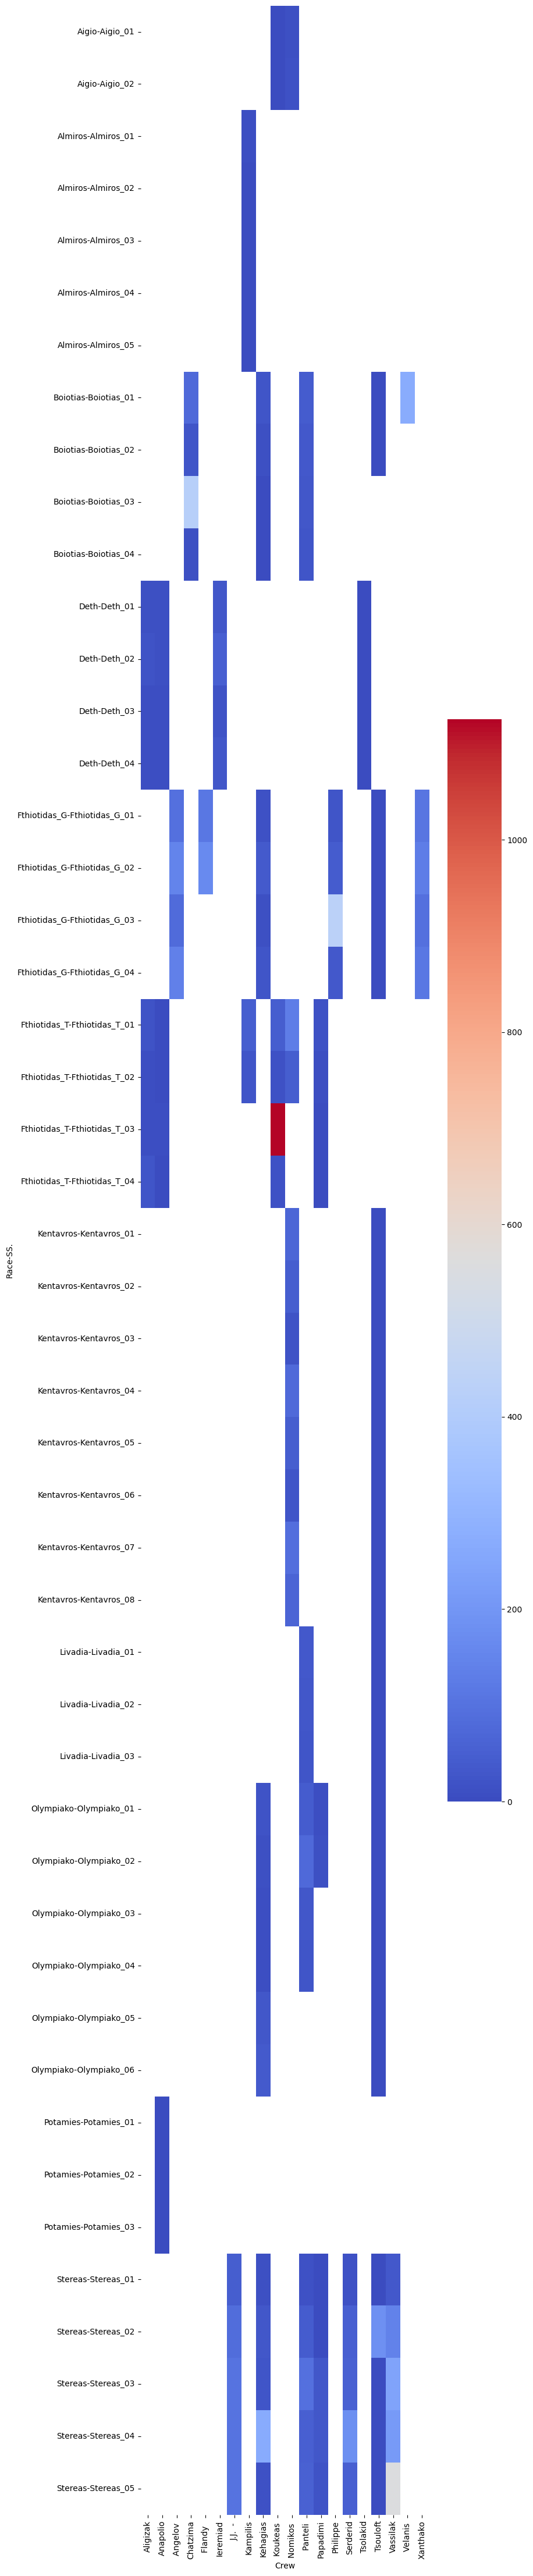

In [7]:
fig,ax = plt.subplots()
fig.set_size_inches(8,56)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F4, cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.savefig("Rc1.jpg")
plt.show()